#EXTRACION DE DATOS EN CSV

In [8]:
import pandas as pd

df_exp = pd.read_csv("/content/df_exp.csv")
df_exp.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [9]:
df_exp.drop(columns=["customerID"], inplace=True)
df_exp.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [12]:
from sklearn.preprocessing import OneHotEncoder

categoricas = [
    "Churn", "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]


encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore")


encoded = encoder.fit_transform(df_exp[categoricas])


encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categoricas))

df_final = pd.concat([df_exp.drop(columns=categoricas), encoded_df], axis=1)

df_final.head()

,tenure,OnlineBackup,MonthlyCharges,TotalCharges,Cuentas_Diarias,Churn_Desconocido,Churn_No,Churn_Yes,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,Yes,65.6,593.30,2.186667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,9,No,59.9,542.40,1.996667,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,No,73.9,280.85,2.463333,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,13,Yes,98.0,1237.85,3.266667,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3,No,83.9,267.40,2.796667,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [17]:
cancelados= df_final["Churn_Yes"].value_counts()
activos= df_final["Churn_No"].value_counts()
desconocidos= df_final["Churn_Desconocido"].value_counts()

print(cancelados)
print(activos)
print(desconocidos)


0.0    14534
1.0     7267
Name: count, dtype: int64


In [19]:

cancelados= df_final["Churn_Yes"].value_counts(normalize=True)
activos= df_final["Churn_No"].value_counts(normalize=True)
desconocidos= df_final["Churn_Desconocido"].value_counts(normalize=True)

print(cancelados)
print(activos)
print(desconocidos)
##Conclusión general:

#Aproximadamente 1 de cada 4 clientes cancela (26%).

#El resto (74%) permanece activo.

#El desbalance entre clases no es extremo, pero sí existe: un modelo trivial que prediga siempre "no cancela" acertaría en ~74% de los casos.

Churn_Yes
0.0    0.74281
1.0    0.25719
Name: proportion, dtype: float64
Churn_No
1.0    0.711986
0.0    0.288014
Name: proportion, dtype: float64
Churn_Desconocido
0.0    0.969176
1.0    0.030824
Name: proportion, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE
y = df_final["Churn_Yes"]
X = df_final.drop(columns=["Churn_Yes"])

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribución después de SMOTE:")
print(y_smote.value_counts(normalize=True))

ValueError: could not convert string to float: 'Yes'

In [22]:
df_final.head()

,tenure,OnlineBackup,MonthlyCharges,TotalCharges,Cuentas_Diarias,Churn_Desconocido,Churn_No,Churn_Yes,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,9,Yes,65.6,593.30,2.186667,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,9,No,59.9,542.40,1.996667,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,No,73.9,280.85,2.463333,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,13,Yes,98.0,1237.85,3.266667,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3,No,83.9,267.40,2.796667,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
from sklearn.preprocessing import StandardScaler

numericas= ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']
df_final[numericas] = StandardScaler().fit_transform(df_final[numericas])
df_final['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1})
df_final.head()

,tenure,OnlineBackup,MonthlyCharges,TotalCharges,Cuentas_Diarias,Churn_Desconocido,Churn_No,Churn_Yes,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.950200,1.0,0.029206,-0.743818,0.029206,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.950200,0.0,-0.159990,-0.766256,-0.159990,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.153700,0.0,0.304702,-0.881554,0.304702,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.787401,1.0,1.104635,-0.459685,1.104635,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.194400,0.0,0.636624,-0.887483,0.636624,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias', 'Churn_Yes']

df_numerica = df_final[numericas]
corr = df_numerica.corr()
corr

,tenure,MonthlyCharges,TotalCharges,Cuentas_Diarias,Churn_Yes
tenure,1.000000,0.247982,0.825118,0.247982,-0.344079
MonthlyCharges,0.247982,1.000000,0.652109,1.000000,0.189866
TotalCharges,0.825118,0.652109,1.000000,0.652109,-0.194440
Cuentas_Diarias,0.247982,1.000000,0.652109,1.000000,0.189866
Churn_Yes,-0.344079,0.189866,-0.194440,0.189866,1.000000


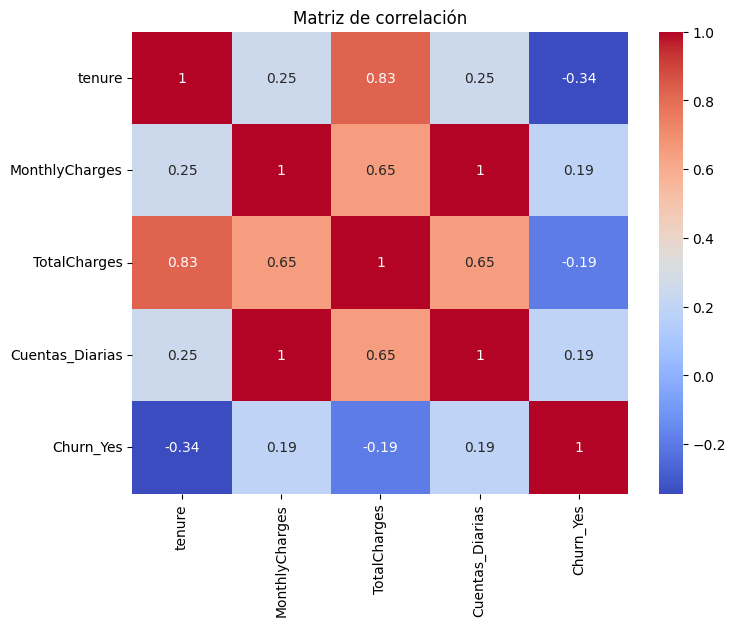

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

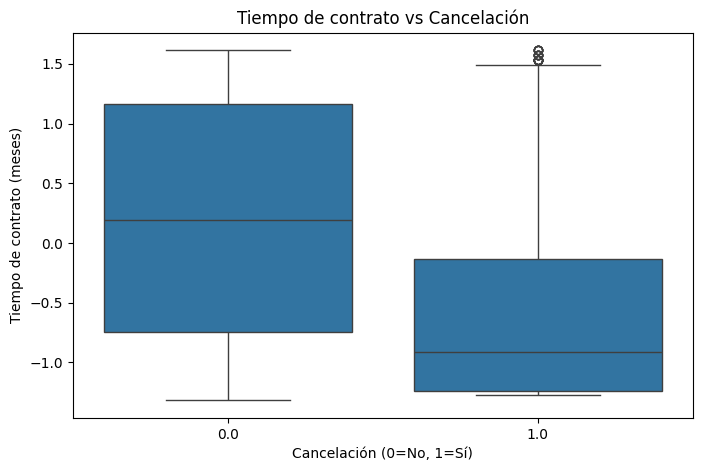

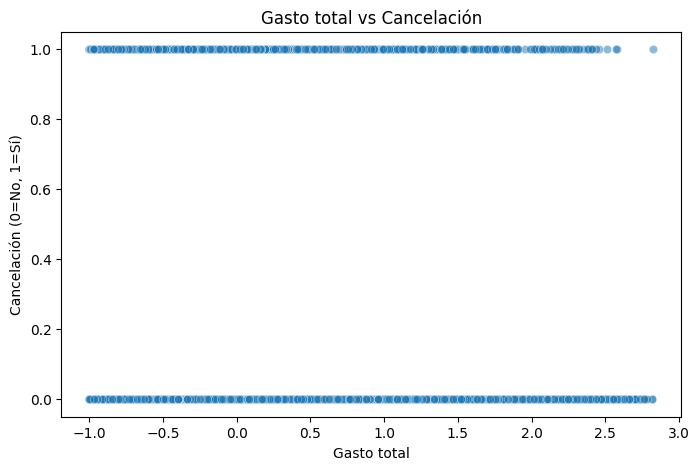

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_Yes', y='tenure', data=df_numerica)
plt.xlabel("Cancelación (0=No, 1=Sí)")
plt.ylabel("Tiempo de contrato (meses)")
plt.title("Tiempo de contrato vs Cancelación")
plt.show()


plt.figure(figsize=(8,5))
sns.scatterplot(x='TotalCharges', y='Churn_Yes', data=df_numerica, alpha=0.5)
plt.xlabel("Gasto total")
plt.ylabel("Cancelación (0=No, 1=Sí)")
plt.title("Gasto total vs Cancelación")
plt.show()

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']
X = df_numerica.drop(columns=['Churn_Yes'])  # todas las demás columnas
y = df_numerica['Churn_Yes']                 # columna objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (5086, 4)
Tamaño de X_test: (2181, 4)
Tamaño de y_train: (5086,)
Tamaño de y_test: (2181,)


In [43]:
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']
for col in numericas:
    df_numerica[col] = df_numerica[col].fillna(df_numerica[col].mean())

    categoricas = ['OnlineBackup', 'StreamingMovies', 'gender_Female']
for col in categoricas:
    df_numerica.loc[:, col] = df_numerica[col].fillna(0)

/tmp/ipython-input-266142152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica[col] = df_numerica[col].fillna(df_numerica[col].mean())


KeyError: 'OnlineBackup'

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix






X = df_numerica.drop(columns=['Churn_Yes'])
y = df_numerica['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# MODELO 1: REGRESIÓN LOGÍSTICA


scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numericas] = scaler.fit_transform(X_train[numericas])
X_test_scaled[numericas] = scaler.transform(X_test[numericas])

modelo_log = LogisticRegression()
modelo_log.fit(X_train_scaled, y_train)


y_pred_log = modelo_log.predict(X_test_scaled)
print("Regresión Logística - Exactitud:", accuracy_score(y_test, y_pred_log))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))

Regresión Logística - Exactitud: 0.8028427326914259
Matriz de confusión:
 [[1522  127]
 [ 303  229]]


In [47]:
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train, y_train)

# Predecir y evaluar
y_pred_tree = modelo_tree.predict(X_test)
print("\nÁrbol de Decisión - Exactitud:", accuracy_score(y_test, y_pred_tree))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_tree))


Árbol de Decisión - Exactitud: 0.7267308574048602
Matriz de confusión:
 [[1359  290]
 [ 306  226]]


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


def evaluar_modelo(y_test, y_pred, nombre_modelo):
    print(f"--- {nombre_modelo} ---")
    print("Exactitud:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1-score:", round(f1_score(y_test, y_pred), 3))
    print("Matriz de confusion:\n", confusion_matrix(y_test, y_pred))
    print("\n")


evaluar_modelo(y_test, y_pred_log, "Regresión Logistica")

evaluar_modelo(y_test, y_pred_tree, "Arbol de Decision")

--- Regresión Logística ---
Exactitud: 0.803
Precisión: 0.643
Recall: 0.43
F1-score: 0.516
Matriz de confusión:
 [[1522  127]
 [ 303  229]]


--- Árbol de Decisión ---
Exactitud: 0.727
Precisión: 0.438
Recall: 0.425
F1-score: 0.431
Matriz de confusión:
 [[1359  290]
 [ 306  226]]




#Conclusion
 Al realizar interpretaciones simples  concluyo lo siguiente:

 1.  EXACTITUD: La regresion logistica acierta mas predicciones totales que el arbol de decision.
 2. PRECISION: La regresion logistica predice mejor a los clientes que realmente cancelan.
 3. RECALL: AMbos modelos capturan la misma cantidad de clintes que realmente cancelan.

 EN general la regresion logistica tiene mejor desempeño  que el arbbol de decision.
 ambos modelos no logran campturar los clientes que realmente cancelan.

 como conclusion final los clientes con poco tiempo de contrato,altos costos mensuales y sin servicios adiconales  son los que mas probable cancelen el servicios.